<a href="https://colab.research.google.com/github/ypahaly/Linear-Model-Predictive-Control/blob/experiments/neutralization_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

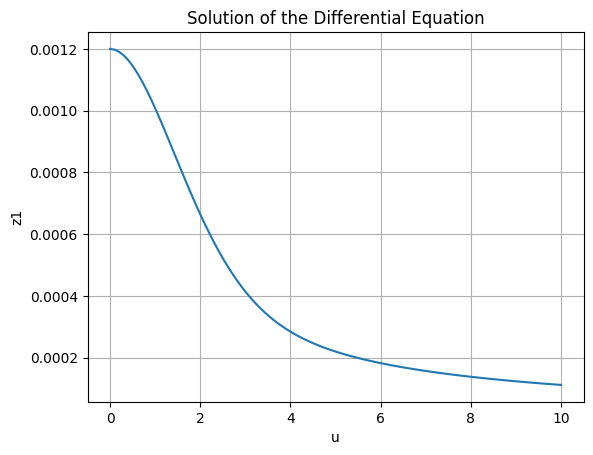

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model(z1, u):
    theta = 2.5
    z1_initial = 0.0012

    dz1_dt = (1/theta) * (z1_initial - z1) - (1/theta) * z1 * u
    return dz1_dt

# Set up time points for integration
u = np.linspace(0, 10, 100)  # Adjust the time range and number of points as needed

# Set initial condition
z1_initial = 0.0012

# Solve the ODE using odeint
z1_sol = odeint(model, z1_initial, u)

# Plot the solution
plt.plot(u, z1_sol)
plt.xlabel('u')
plt.ylabel('z1')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()




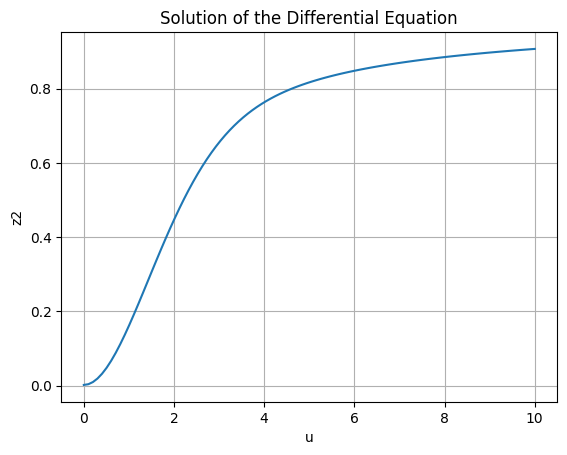

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model2(z2, u):
    theta = 2.5
    z2_initial = 1


    dz2_dt = (1/theta) * (z2_initial - z2) * u - (1/theta) * z2
    return dz2_dt

# Set up time points for integration
u = np.linspace(0, 10, 100)  # Adjust the time range and number of points as needed

# Set initial condition
z2_initial = 0.002

# Solve the ODE using odeint
z2_sol = odeint(model2, z2_initial, u)

# Plot the solution
plt.plot(u, z2_sol)
plt.xlabel('u')
plt.ylabel('z2')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()



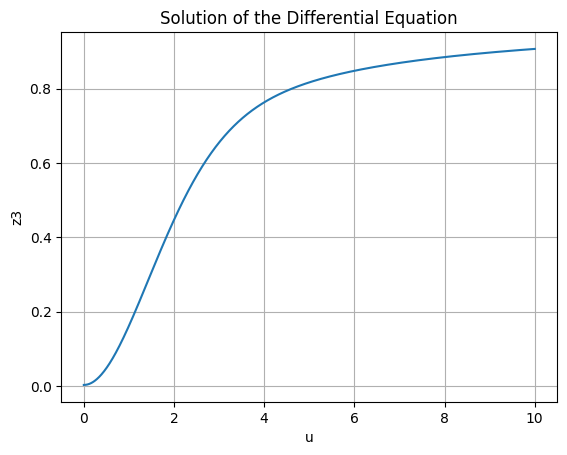

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE function
def model3(z3, u):
    theta = 2.5
    z3_initial = 1

    dz3_dt = (1/theta) * (z3_initial - z3) * u - (1/theta) * z3
    return dz3_dt

# Set up time points for integration
u = np.linspace(0, 10, 1000)  # Adjust the time range and number of points as needed

# Set initial condition
z3_initial = 0.0025

# Solve the ODE using odeint
z3_sol = odeint(model3, z3_initial, u)

# Plot the solution
plt.plot(u, z3_sol)
plt.xlabel('u')
plt.ylabel('z3')
plt.title('Solution of the Differential Equation')
plt.grid()
plt.show()


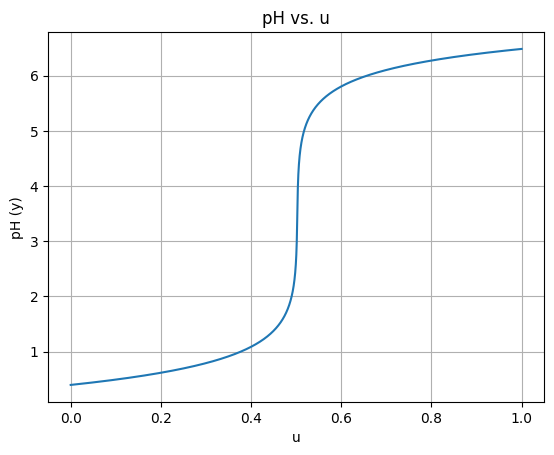

In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Define the equation h(z, y)
def h(y, z1, z2, z3 ,u):
    e = pow(10,-y)
    theta =2.5
    z1_initial = 1
    z2_initial = 1
    z3_initial = 1
    z1= (1/theta) * (z1_initial - z1) - (1/theta) * z1 * u
    z2= (1/theta) * (z2_initial - z2) * u - (1/theta) * z2
    z3= (1/theta) * (z3_initial - z3) * u - (1/theta) * z3

    return  e + z2 + z3 - z1 - (pow(10,-7) / e) - (z3 / (1 + (pow(10,7) * e)))

# Set up time points for integration
u_values = np.linspace(0, 1, 10000)  # Adjust the time range and number of points as needed

# Initial values of z1, z2, z3
z1_initial = 0.0012
z2 = 0.002 # Provide a value for z2
z3 = 0.0025 # Provide a value for z3

# Store the values of y that satisfy h(z, y) = 0 at different time points
y_values = [ ]

# Solve for y at each time point using the bisection method
for u in u_values:
    y_solution = bisect(h, -10, 10, args=(z1_initial, z2, z3, u))
    y_values.append(y_solution)
# Plot the graph of y vs. t
plt.plot(u_values, y_values)
plt.xlabel('u')
plt.ylabel('pH (y)')
plt.title('pH vs. u')
plt.grid()
plt.show()



Creating Dataset

In [48]:
import pandas as pd

df = pd.DataFrame({'u_values': u_values, 'y_values': y_values}, columns=['u_values', 'y_values'])
df['y_values'] = df['y_values'].round(3)
print(df)
df.to_csv('dataset.csv')

      u_values  y_values
0       0.0000     0.397
1       0.0001     0.397
2       0.0002     0.397
3       0.0003     0.397
4       0.0004     0.397
...        ...       ...
9995    0.9996     6.483
9996    0.9997     6.483
9997    0.9998     6.483
9998    0.9999     6.483
9999    1.0000     6.484

[10000 rows x 2 columns]


Saving Dataset

In [49]:
data = pd.read_csv("dataset.csv")

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.drop(['y_values'],axis=1)
y=data['y_values']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled,y_train)

y_pred = linear_regression_model.predict(X_test_scaled)

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("R2 Score: ", r2_score(y_test,y_pred))

Mean Squared Error:  1.04053640681452
R2 Score:  0.8514236402137023


Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
import numpy as np
rng = np.random.RandomState(100)
rdg = Ridge(alpha = 0.5)
rdg.fit(X_train, y_train)

rdg.score(X_test,y_test)

0.8514236402138184

Single Feature SVM with Linear Kernel

Mean Squared Error:  1.0302373158486848
R2 Score:  0.8535859277101299


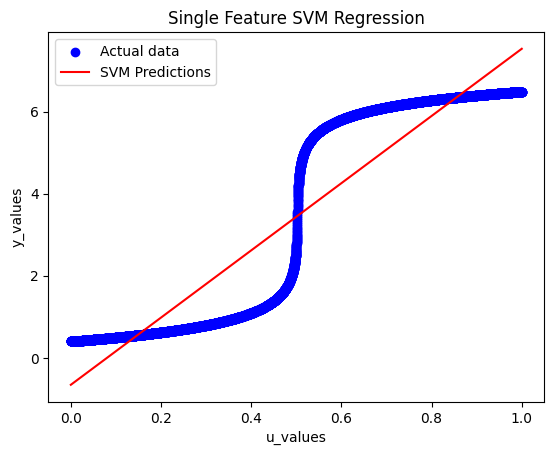

In [53]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


u_values = df['u_values'].values.reshape(-1, 1)
y_values = df['y_values'].values


svm_model = SVR(kernel='linear')
svm_model.fit(u_values, y_values)

# Make predictions
predictions = svm_model.predict(u_values)

print("Mean Squared Error: ", mean_squared_error(y_values,predictions))
print("R2 Score: ", r2_score(y_values,predictions))

# Plotting the results
plt.scatter(u_values, y_values, color='blue', label='Actual data')
plt.plot(u_values, predictions, color='red', label='SVM Predictions')
plt.xlabel('u_values')
plt.ylabel('y_values')
plt.title('Single Feature SVM Regression')
plt.legend()
plt.show()

Single Feature Kernel with rbf kernel

Mean Squared Error:  0.12020210369165091
R2 Score:  0.9829172568023262


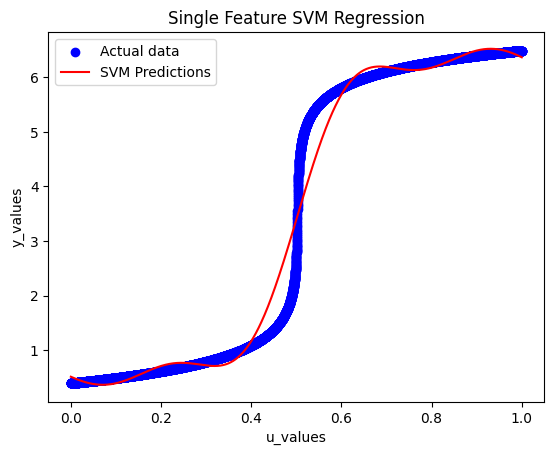

In [54]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


u_values = df['u_values'].values.reshape(-1, 1)
y_values = df['y_values'].values


svm_model = SVR(kernel='rbf')
svm_model.fit(u_values, y_values)

# Make predictions
predictions = svm_model.predict(u_values)

print("Mean Squared Error: ", mean_squared_error(y_values,predictions))
print("R2 Score: ", r2_score(y_values,predictions))

# Plotting the results
plt.scatter(u_values, y_values, color='blue', label='Actual data')
plt.plot(u_values, predictions, color='red', label='SVM Predictions')
plt.xlabel('u_values')
plt.ylabel('y_values')
plt.title('Single Feature SVM Regression')
plt.legend()
plt.show()
